In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Load dataset
df = pd.read_csv("ecommerce_dataset.csv", sep=";")
df

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12/11/2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09/02/2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01/09/2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01/04/2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27/09/2024
...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14/05/2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19/11/2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07/08/2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21/05/2024


In [6]:
# Menghapus nilai yang hilang
df.dropna(inplace=True)
print("Jumlah nilai yang hilang setelah dihapus:")
print(df.isnull().sum())

Jumlah nilai yang hilang setelah dihapus:
User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64


In [7]:
# Mengubah format tanggal
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d/%m/%Y')
print("Format tanggal setelah konversi:")
print(df['Purchase_Date'].head())

Format tanggal setelah konversi:
0   2024-11-12
1   2024-02-09
2   2024-09-01
3   2024-04-01
4   2024-09-27
Name: Purchase_Date, dtype: datetime64[ns]


In [8]:
# Mengubah kategori menjadi numerik
label_encoders = {}
categorical_columns = ['Category', 'Payment_Method']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("Kategori setelah dikonversi:")
print(df[categorical_columns].head())

Kategori setelah dikonversi:
   Category  Payment_Method
0         5               3
1         2               3
2         5               1
3         6               4
4         0               3


In [9]:
# Normalisasi Data
scaler = MinMaxScaler()
df[['Price (Rs.)', 'Final_Price(Rs.)']] = scaler.fit_transform(df[['Price (Rs.)', 'Final_Price(Rs.)']])
print("Data harga setelah normalisasi:")
print(df[['Price (Rs.)', 'Final_Price(Rs.)']].head())

Data harga setelah normalisasi:
   Price (Rs.)  Final_Price(Rs.)
0     0.053974          0.051250
1     0.454610          0.367344
2     0.626554          0.472308
3     0.332945          0.252582
4     0.479127          0.386919


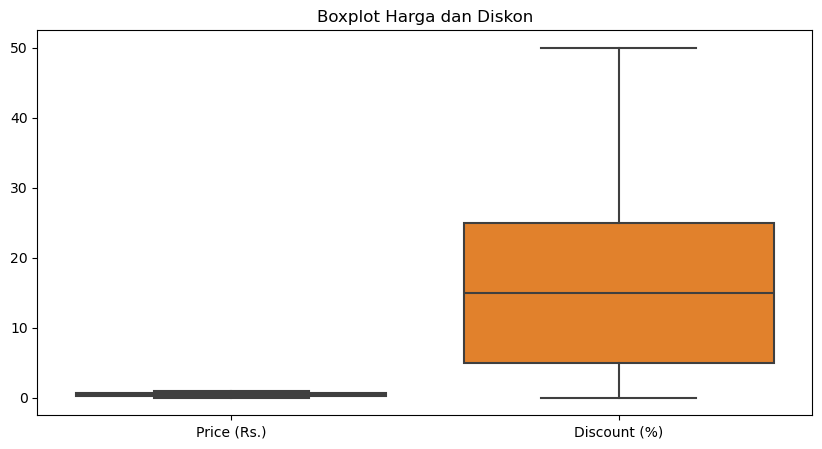

In [10]:
# Deteksi Outlier menggunakan Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Price (Rs.)', 'Discount (%)']])
plt.title("Boxplot Harga dan Diskon")
plt.show()

In [12]:
# Pembentukan Model Regresi Linear
X = df[['Price (Rs.)', 'Discount (%)']]
y = df['Final_Price(Rs.)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Analisis Akurasi Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.0021218785380150294
R-squared (R²): 0.9648438931112711
Mean Absolute Error (MAE): 0.030843582287789217


In [14]:
# Pengujian Model
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Perbandingan nilai aktual dan prediksi:")
print(comparison.head())

Perbandingan nilai aktual dan prediksi:
        Actual  Predicted
291   0.369238   0.444639
270   0.123011   0.174252
149   0.327990   0.340270
1188  0.689610   0.660666
2037  0.422586   0.531672


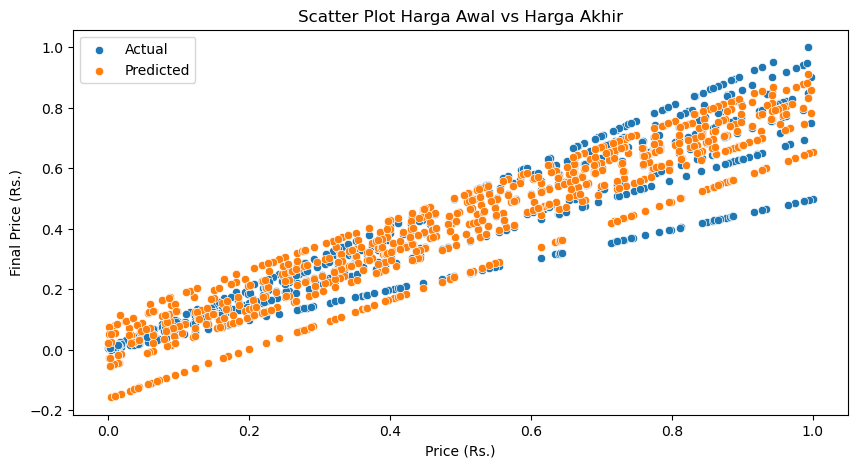

In [15]:
# Visualisasi Model
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_test['Price (Rs.)'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['Price (Rs.)'], y=y_pred, label='Predicted')
plt.title("Scatter Plot Harga Awal vs Harga Akhir")
plt.xlabel("Price (Rs.)")
plt.ylabel("Final Price (Rs.)")
plt.legend()
plt.show()

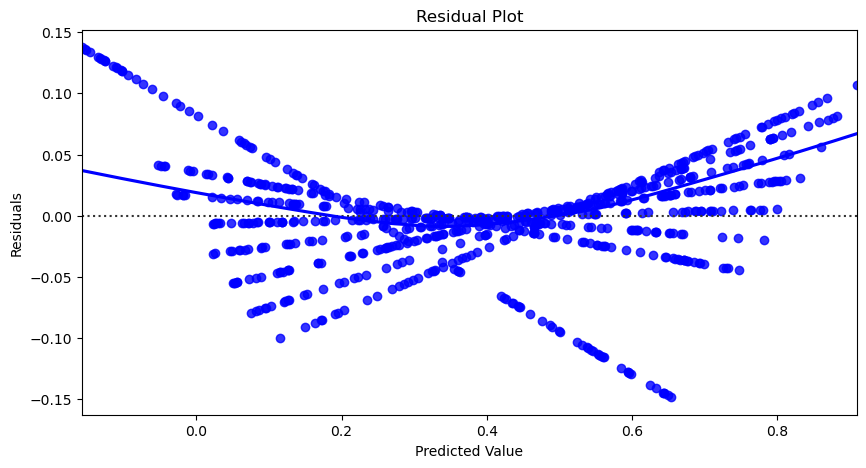

In [16]:
# Residual Plot
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color='blue')
plt.title("Residual Plot")
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.show()